# Advanced lane lines

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import glob

import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.pipeline import Pipeline

from pipeline_components import DistortionCorrector, ImageThresholder, PerspectiveTransformer

## Part 1: Camera calibration

### Fit a distortion corrector
- Activate the `plot_corners` to eyeball the correct detection of chess corners
- Fit on the calibration images

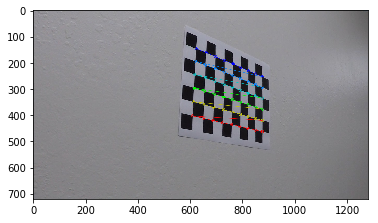

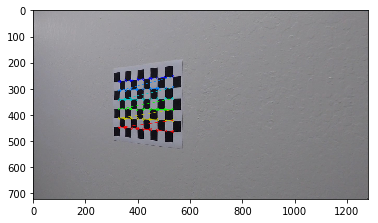

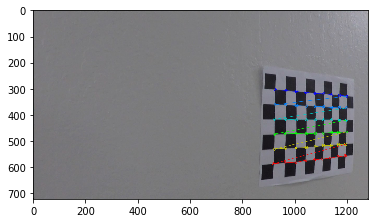

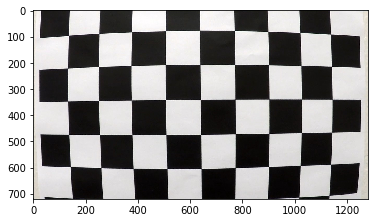

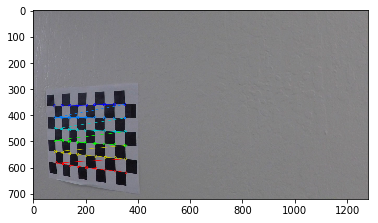

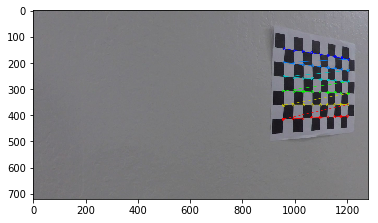

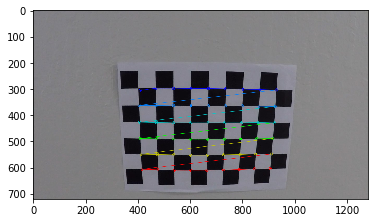

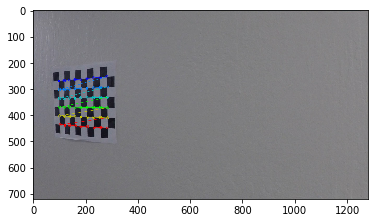

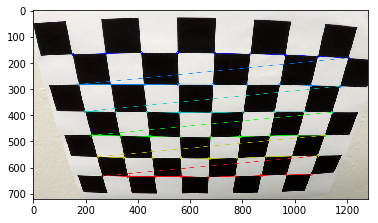

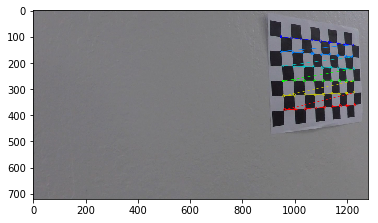

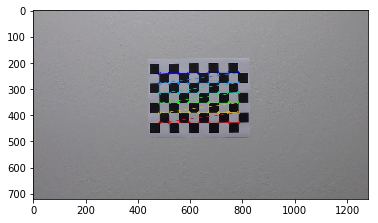

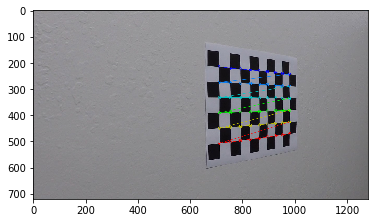

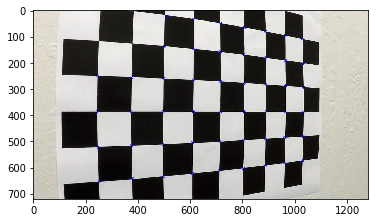

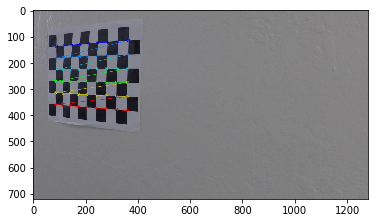

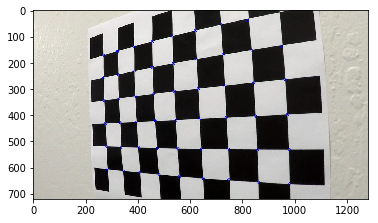

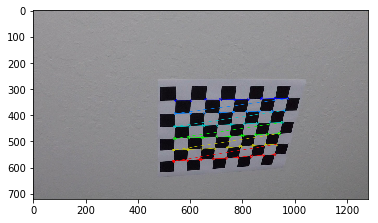

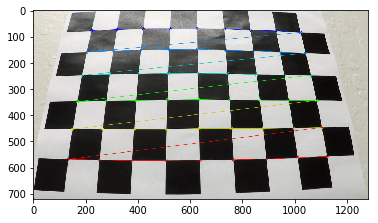

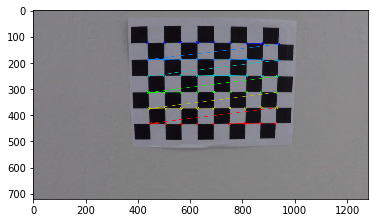

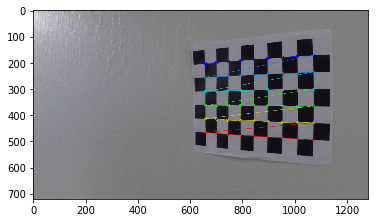

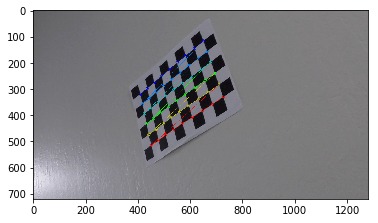

DistortionCorrector(corner_shape=(9, 6))

In [3]:
calibration_images = [plt.imread(filepath) for filepath in glob.glob('./camera_cal/calibration*.jpg')]

distortion_corrector = DistortionCorrector()
distortion_corrector.fit(calibration_images, plot_corners=True)

### Test on a couple of obviously distorted images

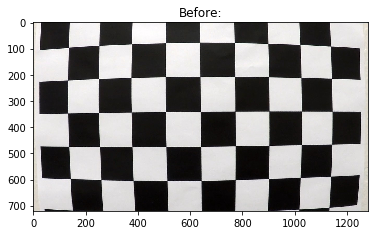

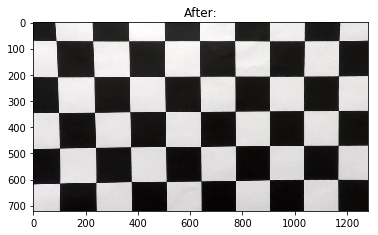

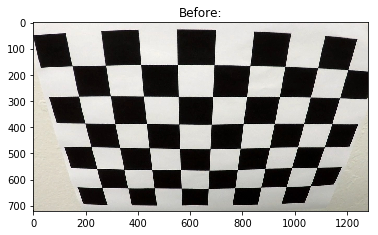

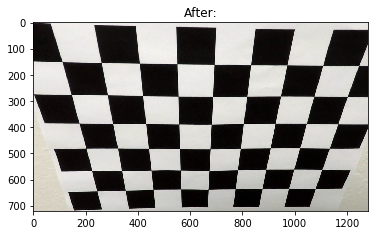

In [4]:
plt.title('Before:')
plt.imshow(calibration_images[3])
plt.show()
plt.title('After:')
plt.imshow(distortion_corrector.transform(calibration_images[3]))
plt.show()

plt.title('Before:')
plt.imshow(calibration_images[8])
plt.show()
plt.title('After:')
plt.imshow(distortion_corrector.transform(calibration_images[8]))
plt.show()

## Part 2: Image thresholding

In [5]:
test_images = [plt.imread(filepath) for filepath in glob.glob('./test_images/*')]

### Define an image thresholder
- Using only a thresholding on the S channel of the HLS representation of the image

In [6]:
def threshold_image(image):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    
    return ImageThresholder.scale_and_filter(s_channel, thresh=(150, 255))
    
image_thresholder = ImageThresholder(threshold_image)

### Test on image

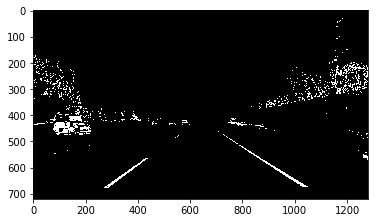

In [7]:
plt.imshow(image_thresholder.transform(test_images[3]), cmap='gray')
plt.show()

## Part 3: Perspective transform
- Define
- Test on image

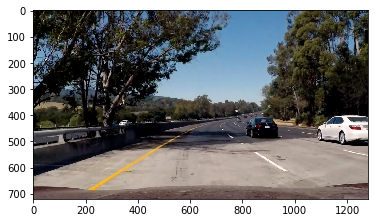

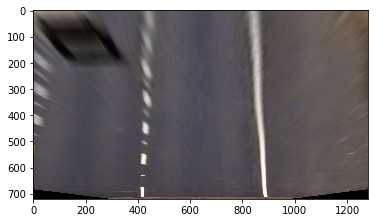

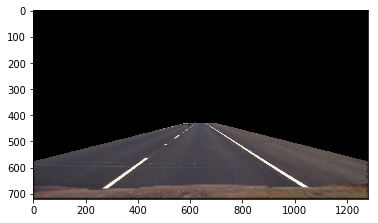

In [18]:
perspective_transformer = PerspectiveTransformer(test_images[3].shape)
perspective_transformer.fit()
inverse_perspective_transformer = PerspectiveTransformer(test_images[3].shape, inverse=True)
inverse_perspective_transformer.fit()

plt.imshow(test_images[5])
plt.show()
plt.imshow(perspective_transformer.transform(test_images[3]))
plt.show()
plt.imshow(inverse_perspective_transformer.transform(perspective_transformer.transform(test_images[3])))
plt.show()

## Part 4: Extract lane fitted polynomials

## Part 5: Calculate curvature radius and vehicle position relative to the lanes center

## Part 6: Define whole pipeline and plot area between lanes

In [31]:
lane_discovery_pipeline = Pipeline([
    ("distortion_correctord", distortion_corrector),
    ("image_thresholder", image_thresholder),
    ("perspective_transformer", perspective_transformer),
    ("inverse_perspective_transformer", inverse_perspective_transformer)
])

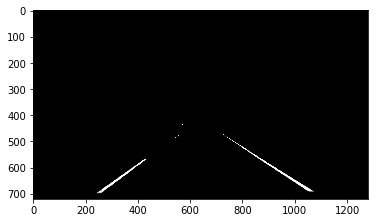

In [33]:
plt.imshow(lane_discovery_pipeline.transform(test_images[3]), cmap='gray')
plt.show()